# ex01

## 텍스트 데이터 다루기
- 수치형 데이터와 달리, 텍스트 데이터의 길이는 일정하지 않다
- 전처리가 많이 필요하다

### 영화 리뷰 감성 분석
- 스탠포드 대학의 앤드류 마스가 IMDb(Internet Movie Database)에서 수집한 영화 리뷰 텍스트를 분석
- 25,000개의 훈련 데이터와 25,000개의 테스트 데이터를 제공
- 다음 사이트에서 데이터를 다운로든 받는다 (파일명 aclIMDb_v1.tar.gz, 80Mb)
http://ai.stanford.edu/~amaas/data/sentiment/
- 압축을 푼다 (tar -zcvf 파일명)
- aclIMDb 디렉토리에 여러가지 파일이 생긴다
- 레이블: 양성/음성 (1~10점에서, 7점 이상은 양성, 4점 이하는 음성으로 표현함, 중간 데이터는 포함하지 않음)

In [1]:
from sklearn.datasets import load_files
import numpy as np

In [2]:
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환
reviews_train = load_files("./data/aclImdb/train", shuffle=True)
type(reviews_train)

sklearn.utils.Bunch

In [3]:
reviews_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
#지금 text_train인 이유는 아직 전처리도 안하고 전부 쓸건아니기때문에 X_train이라고 안한다.
text_train, y_train = reviews_train.data, reviews_train.target#데이터와, 리뷰글씨
print("text_train의 타입: {}".format(type(text_train)))
print("text_train의 길이: {}".format(len(text_train)))

text_train의 타입: <class 'list'>
text_train의 길이: 25000


In [5]:
#첫번째부터 2번째까지 리뷰(0부터 1까지)
print("text_train:\n{}".format(text_train[:2]))
print("y_train:\n{}".format(y_train[0:20]))
#0은 부정 neg 1은 긍정 pos

text_train:
[b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.", b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are 

In [6]:
#글자안에 있는 <br />을 지워줄건데 replace사용시 타입이 같아야한다.
type(text_train[0])#text_train타입은 bytes

bytes

In [7]:
#모든 br을 지우고 스페이스로 바꾼다.
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [8]:
#사라졌는지 확인
print("text_train:\n{}".format(text_train[20000:20007]))

text_train:
[b"Poor Ivy: Though to the manner born, she had the bad luck to marry a charming wastrel (Richard Ney). As the movie is set in the 20s or 30s, when rigid Victorian ideas of class were starting to fray at the edges, this uncertain status vexes her unduly. The Gretorexes (for so they are called) don't know where their next shilling is coming from but there are yachting parties and fancy-dress balls in posh pleasaunces aplenty to tempt her. When Ivy (Joan Fontaine) makes the acquaintance of a wealthy older gent (Herbert Marshall, who must have been born middle-aged), she sets one of her extravant chapeaux for him. Luckily, one of the beaux she still strings along (Patric Knowles) is a physician whose consulting rooms provide a cache of poison, with which she bids her hubby farewell. The fact that it implicates Knowles doesn't phase her a bit, even as the hours trickle by until he should be hanged by the neck until dead. The turning of the plot depends on police inspector Sir C

In [9]:
print("클래스별 샘플 수 (훈련 데이터): {}".format(np.bincount(y_train)))
#긍정이 12500개 부정이 12500개
#이미 만들어진 데이터이기 때문에 딱 맞춰놓음

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [10]:
#0은 부정 neg 1은 긍정 pos
y_train[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [11]:
#train을 가지고 온 것처럼 똑같이 test데이터도 가지고온다.
reviews_test = load_files('./data/aclImdb/test/')
type(reviews_test)

sklearn.utils.Bunch

In [12]:
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수: {}".format(len(text_test)))
print("클래스별 샘플 수 (테스트 데이터): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


In [13]:
y_test[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

# ex02

### 텍스트 데이터를 BOW로 표현하기
- 문장의 구조 정보는 잃고, 문서내에 단어의 발생 빈도만 분석에 사용하는 방법
- 토큰화: 공백이나 구두점을 경계로 단어는 나누는 것
- **어휘사전** 구축: 모든 문서에 나타난 모든 단어의 사전을 만든다 (0번 부터 단어에 번호를 배정)
- 인코딩: 사전의 각 단어가 몇 번 나타났는지를 측정

#### 샘플 데이터에 BOW 적용하기
- CountVectorizer를 사용
- fit으로 훈련데이터를 토큰으로 나누고 어휘사전을 구축하여, vocabulary_ 에 속성을 저장
- BOW 형식으로 만들려면(인코딩하려면) transform()을 수행 (sparse 형식으로 저장함)

In [14]:
#임의의 데이터를 활용한 BOW연습
bards_words =["The fool doth think he is wise,",
              "but the wise man man knows himself to be a fool"]
#바보는 그가 현명하다고 생각한다. "
#"그러나 지혜로운 사람은 자신이 어리 석다는 것을 안다"

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vect = CountVectorizer()

In [17]:
#어휘사전을 구축만 하면 되니까 값을 하나만 넣는다.
#어휘사전 구축
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
#vocabulary(보카디벌리) : 어휘
print("어휘 사전의 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전의 내용:\n\n {}".format(vect.vocabulary_))     

어휘 사전의 크기: 13
어휘 사전의 내용:

 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [19]:
#모델.transform으로 실행
bag_of_words = vect.transform(bards_words)

In [20]:
print("BOW: {}".format(repr(bag_of_words)))
#너무 많은 내용이 있어서 글로 알려준다.
#--> 2개의 열, 13개의 행이 있다.

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [21]:
##희소행렬을 일반 배열로 바꿔서 보고싶으면 toarray()쓰면된다. 
#지금은 13개밖에 없어서 가능하지만 더 많은 데이터면 컴퓨터가 뻑난다.
#희소행렬을 일반 배열로 바꾸어 보려면 toarray 메소드를 사용하여 Numpy배열로 바꿔야 한다 
#데이터의 크기가 클 때에는 Memory Error 발생을 주의 해야 한다.
print("BOW 표현:\n{}".format(bag_of_words))
print("BOW 표현(array):\n{}".format(bag_of_words.toarray()))

#결과를 보면 the는 0, fool은 0, doth는 1 ...

BOW 표현:
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	2
  (1, 9)	1
  (1, 11)	1
  (1, 12)	1
BOW 표현(array):
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 2 1 0 1 1]]


## 한글로 실습

In [74]:
words =["사과는 맛있어 맛있어",
       "포도도 맛있어",
       "바나나는 맛없어"]

In [75]:
vect2 = CountVectorizer()

In [76]:
vect2.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [77]:
print("어휘 사전의 크기: {}".format(len(vect2.vocabulary_)))
print("어휘 사전의 내용:\n\n {}".format(vect2.vocabulary_))     

어휘 사전의 크기: 5
어휘 사전의 내용:

 {'사과는': 3, '맛있어': 1, '포도도': 4, '바나나는': 2, '맛없어': 0}


In [78]:
of_words = vect2.transform(words)

print("BOW 표현:\n{}".format(of_words))
print("BOW 표현(array):\n{}".format(of_words.toarray()))

BOW 표현:
  (0, 1)	2
  (0, 3)	1
  (1, 1)	1
  (1, 4)	1
  (2, 0)	1
  (2, 2)	1
BOW 표현(array):
[[0 2 0 1 0]
 [0 1 0 0 1]
 [1 0 1 0 0]]


### 영화 리뷰에 대한 BOW (감성분석)

In [79]:
#앞의 IMDb리뷰의 훈련데이터와 테스트데이터
vect = CountVectorizer()
vect.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [80]:
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))# repr사용자가 보기 쉬운 형태로 반환(print안쓰고 그냥 객채만 쓰는거랑 같은 값이 추출됨, 프린트하면 다른 값이 추출되나 repr때문에 그렇게 안된다.)
# 훈련데이터의 BOW표현인 Xtrain의 크기는 25,000 * 74849로 이 어휘사전은 단어를 7만5천개 담고 있음
# 이 데이터는 SciPy희소행렬로 저장되어 있음. 

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [81]:
print(X_train)

  (0, 1639)	1
  (0, 1657)	1
  (0, 2768)	1
  (0, 3258)	2
  (0, 3718)	1
  (0, 4124)	1
  (0, 6334)	1
  (0, 6663)	2
  (0, 7095)	2
  (0, 7145)	1
  (0, 7518)	1
  (0, 8714)	1
  (0, 9881)	2
  (0, 10582)	1
  (0, 12582)	1
  (0, 12694)	1
  (0, 13616)	1
  (0, 13635)	1
  (0, 15137)	1
  (0, 16697)	1
  (0, 16929)	1
  (0, 17169)	1
  (0, 17920)	1
  (0, 18292)	1
  (0, 19326)	1
  :	:
  (24999, 68412)	1
  (24999, 68769)	1
  (24999, 70505)	1
  (24999, 70920)	1
  (24999, 71159)	2
  (24999, 71547)	1
  (24999, 71923)	1
  (24999, 72196)	6
  (24999, 72339)	1
  (24999, 72557)	1
  (24999, 72703)	1
  (24999, 72709)	1
  (24999, 72757)	1
  (24999, 72768)	1
  (24999, 72773)	1
  (24999, 72904)	2
  (24999, 73091)	2
  (24999, 73108)	1
  (24999, 73342)	2
  (24999, 73599)	1
  (24999, 73683)	1
  (24999, 73700)	1
  (24999, 74216)	1
  (24999, 74324)	4
  (24999, 74349)	1


In [82]:
# get_feature_names 메소드는 각 특성에 해당하는 단어를 리스트로 반환함. 
feature_names = vect.get_feature_names()

In [83]:
print("특성 개수: {}".format(len(feature_names)))
print("처음 20개 특성:\n{}".format(feature_names[:20]))
print("20010에서 20030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 2000번째 특성:\n{}".format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


- 의미 없는 숫자들이 평가 문서에 많이 들어 있는 것을 알 수 있다.
- 아무런 데이터 전처리를 하지 않고, 로지스틱 회귀분석을 적용할 때의 성능을 살펴보겠다.
- 교차검증을 해보니, 이 모델의 성능은 0.88이었다

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [85]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("크로스 밸리데이션 평균 점수: {:.2f}".format(np.mean(scores)))

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


크로스 밸리데이션 평균 점수: 0.88


- 고차원 희소행렬 데이터의 경우 로지스틱 리그레션을 이용한 분류기의 성능이 가장 좋다
- LogisticRegression과 LinearsSVC에서 규제의 강도를 결정하는 매개변수는 C
- C의 값이 높아지면 규제가 감소. 높은값을 지정하면, 훈련세트에 가능한 최대로 맞추려 하고, 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만들어짐. 
- Ridge와 마찬가지고 L2규제를 사용함. 왜? To avoid overfitting
- L1: 영향없는 특성을 없애는 효과, L2: Dominant한 특성의 영향을 줄이는 효과
- 그리드 검색을 사용하겠다.

< 규제 : 더 좋은 모델을 만들기위해 너무 복잡한 모델을 안만들기 위해서 사용
Dcision tree를 max_dapth주는것처럼 규제를 줘야한다.
규제는 L1과 L2규제가 있다.
L1은 전체를 제제한다. 전체를 제제하면 영향력이 작은 컬럼들은 사라진다.(라쏘, 중요한것만)
L2는 영향력이 많은 애들은 제제시킨다. 그럼 영향력 없는 애들이 영향력이 생김(릿지, 골고루)
>

In [86]:
#파라메터에서 최적을 찾아주는 모듈 GridSearchCV
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {'C': [0.01, 0.05, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
print(grid)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)


In [88]:
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 크로스 밸리데이션 점수: 0.89
최적의 매개변수:  {'C': 0.05}


In [89]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [90]:
#실제 사용하면 이렇게 하면 된다.
model = LogisticRegression(C=0.05)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.88212

### 데이터 전처리
- 성능을 개선하기 위해서 의미 있는 데이터만 포함하도록 데이터를 전처리한다
- 의미 없는 데이터를 삭제해야 성능이 개선된다
- CountVectorizer는 모든 영문은 소문자로 바꾼다
- 전체 문서중에 적어도 2개의 문서 이상에서 등장한 단어만 고려한다. 적은 수의 문서에서만 등장한 단어는 일반성이 떨어지는 특수 단어이므로 테스트 문서에 나타날 가능성이 거의 없기 때문이다.
- 이를 위해 min_df 변수를 지정한다
- 아래에 5개 이상의 문서에 나타난 단어만 선택하여 특성의 갯수를 약 1/3인 27000여개로 줄였다
- 철자가 틀린 단어도 제외할 수 있다
- **어휘 사전에 없던 단어가 테스트 셋에 나타나면 이는 무시한다**

In [91]:
#|b|w|w + |b => 경계(b)가 구분되고 적어도 둘이상의 문자나 숫자(w)가 연속된 단어를 찾음
# 한글자로 된 단어는 찾지 않으며, 축약형은 분리되고, 모두 소문자로 바꿈
#의미없는 특성(숫자같은)을 줄이는 방법은? 적어도 두개의 문서(또는 다섯개문서)에 나타난
# 단어만 사용. min_df매개변수로 최소 문서 개수를 지정할수 있음. 
# 전체를 보았을때 5번 이상 나온 데이터만 테이블에 입력하겠다.(이하를 지우겠다.)
vect = CountVectorizer(min_df=5).fit(text_train)#학습할 대상을 넣는다., 5개 이상에서만 보려고 다시함
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train: {}".format(repr(X_train)))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [92]:
#밑에있는 단어는 min_df=5이기 때문에 5문장이상 나온 단어들만 나옴
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

In [93]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
#모델성능은 별로 개선되지 않았지만 특성의 갯수가 줄어 처리속도가 빨라지고, 불필요한 특성이 없어져
#모델을 이해하기 쉬워짐

#0.01만 올라도 텍스트마이닝에서는 많이 오른거다

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최적의 크로스 밸리데이션 점수: 0.89


### 불용어
- 의미없는 단어 제거: 너무 빈번하여 유용하지 않은 단어를 제외
- 두가지방법: 언어별 stopword목록을 사용 또는 너무 빈번한 단어 제거
- sklearn은 feature_extraction.text 모듈에 영어의 불용어를 포함

In [94]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [95]:
print("불용어 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 5번째 불용어:\n{}".format(list(ENGLISH_STOP_WORDS)[:50]))
#불용어를 제거하면 특성의 개수가 (318개)만큼 줄고 성능이 향상될수 있음

불용어 개수: 318
매 5번째 불용어:
['she', 'no', 'up', 'yours', 'eg', 'by', 'from', 'go', 'my', 'though', 'thence', 'nevertheless', 'will', 'whence', 're', 'throughout', 'hence', 'meanwhile', 'fifteen', 'a', 'being', 'sometimes', 'more', 'back', 'describe', 'ie', 'forty', 'such', 'several', 'to', 'others', 'everything', 'when', 'six', 'one', 'there', 'thick', 'have', 'empty', 'are', 'call', 'amount', 'someone', 'he', 'cannot', 'along', 'thus', 'over', 'even', 'on']


In [96]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 리스트를 사용할 수도 있습니다.
#stop_words="english"를 사용해서 불용어 318개 지워짐
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n{}".format(repr(X_train)))

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [97]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 크로스 밸리데이션 점수: 0.88


- 너무 자주 많은 문서에 나타나는 단어를 제외하는 방법으로 max_df를 지정할 수 있다
- 예를 들어 총 25000개 문서중에 20000개 이상의 문서에 모두 나타나는 단어를 제외하려면 max_df=20000 을 지정하면 된다

In [98]:
#pipline을 사용하면 각 처리단계에서 필요한 매개변수 탐색을 동시에 수행할수 있음. 
# 전처리 + 분류 과정을 위해 작성해야 할 코드가 줄어듬
# cross_val_score나 GridSearchCV에 파이프라인을 적용하는 예

#CountVectorizer의 max_df는 너무 많이 나오는 단어들을 지워준다.
#max_df에 따라 LogisticRegression의 C가 다르기 때문에 모든 경우의 수를 확인
from sklearn.pipeline import make_pipeline

==============***********************************************************************************************==================

In [104]:
pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {'countvectorizer__max_df': [100, 1000,10000], 
              'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
#min_df도 추가해보자

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 크로스 밸리데이션 점수: 0.89
{'countvectorizer__max_df': 10000, 'logisticregression__C': 0.1}


## 그리드서치 정보확인

In [105]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
grid.cv_results_

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([3.5800045 , 3.68961101, 3.80241761, 4.09003377, 4.53585958,
        3.47399859, 3.85742054, 4.17043858, 4.82067575, 5.53951688,
        4.09683433, 4.56126089, 5.58371944, 7.32381902, 8.60969257]),
 'std_fit_time': array([0.27654021, 0.19998011, 0.16199882, 0.1833063 , 0.13030808,
        0.09018142, 0.18478545, 0.1265227 , 0.12539239, 0.17228558,
        0.16162429, 0.11954432, 0.09448637, 0.62165355, 0.13084088]),
 'mean_score_time': array([0.8054461 , 0.79624553, 0.75904326, 0.75404325, 0.75124278,
        0.75564322, 0.82684727, 0.77964458, 0.77124414, 0.74384255,
        0.90305161, 0.84204812, 0.80564609, 0.79204521, 0.79404531]),
 'std_score_time': array([0.0972796 , 0.03912467, 0.00959216, 0.05474982, 0.02862618,
        0.03561447, 0.08860618, 0.03037027, 0.02694148, 0.00968352,
        0.09112918, 0.01395783, 0.02060798, 0.02195581, 0.02106317]),
 'param_countvectorizer__max_df': masked_array(data=[100, 100, 100, 100, 100, 1000, 1000, 1000, 1000, 1000

In [107]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
scores

array([[0.74504, 0.77856, 0.85668, 0.84316, 0.88608],
       [0.78036, 0.76136, 0.85932, 0.84776, 0.87856],
       [0.79488, 0.83628, 0.8496 , 0.87964, 0.87264]])

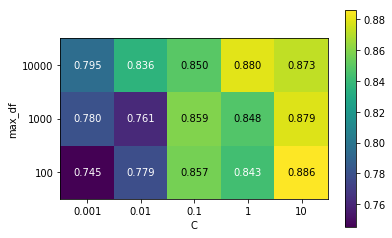

In [108]:
#scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="max_df", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['countvectorizer__max_df'])
plt.colorbar(heatmap)

- 중요하지 않아 보이는 특성을 제외하는 대신, 얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식. 
- Term frequency inverse document frequency (단어빈도-역문서빈도)
- 말뭉치의 다른 문서보다 일부 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
- TfidVectorizer는 (CounterVectorizer의 서브클래스로) 텍스트 데이터를 입력받아 BOW를 만들고, TfidfTransformer를 사용하여 tf-idf 변환을 수행
- TfidfTransformer는 CounterVectorizer가 만든 희소 배열을 사용해 tf-idf변환을 함.
- tf-idf에는 여러 변종이 있다

# ex03

### tf–idf로 데이터 스케일 변경


\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}

- N은 훈련세트에 있는 문서의 개수, Nw는 단어 w가 나타난 훈련세트문서의 개수이며, 
- tf(단어빈도수)는 단어 w가 대상문서 d(변환하려는 문서)에 나타난 횟수. 
- 값 1을 분자, 분모, 그리고 로그 내에 추가한 이유는 분모가 0이되거나 로그값이 0이 되는 것을 방지하기 위해서이다(어떤 단어가 모든 문서에 들어 있는 경우 $log1 = 0$)
- tf-idf계산을 한후에 L2정규화를 수행한다. 다시말해, 유크리디안 놈이 1이 되도록 각 문서 벡터의 스케일을 바꾼다. 
- 이렇게 하는 이유는 벡터 값이 문서의 크기(단어의 수)에 영향을 받지 않도록 하기 위해서임

- tf-idf는 실제로 훈련데이터의 통계적 속성을 사용하기 때문에 파이프라인을 사용한 그리드서치가 편리하다

In [109]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
#param_grid = {'logisticregression__C': [0.1]}
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차검증 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차검증 점수: 0.89
{'logisticregression__C': 10}


In [111]:
TfidfVectorizer()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [112]:
#예제 최상의 C와 min_df를 찾아보자
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())
param_grid = {'tfidfvectorizer__min_df': [3,4,5,6,7], 
                'logisticregression__C': [0.1,1,10]}
# param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차검증 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차검증 점수: 0.89
{'logisticregression__C': 10, 'tfidfvectorizer__min_df': 3}


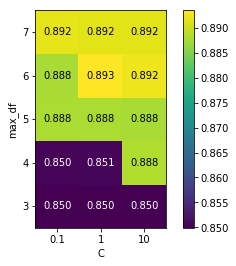

In [113]:
#scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3)
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="max_df", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__min_df'])
plt.colorbar(heatmap)

- 최상의 점수가 0.89로서 개선된 것은 없다
- 이 예에서는 tf-idf가 성능에 큰 영향을 주지 못한다. 그러나 tf-idf는 어떤 단어가 가장 중요한지 알려준다

In [114]:
#파이프라인에서 TfidVectorizer단계를 선택 (소문자로 표현된다)
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [115]:
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)

In [116]:
# 특성별로 가장 큰 값을 찾습니다
#ravel : 다차원 배열을 1차원으로 펴줌
max_value = X_train.max(axis=0).toarray().ravel()
max_value

array([0.38654455, 0.31318054, 0.272404  , ..., 0.40945167, 0.1385818 ,
       0.18461612])

In [117]:
#argsort : 정렬했을 때의 인덱스
sorted_by_tfidf = max_value.argsort()

In [118]:
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("가장 높은 tfidf를 가진 특성: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

가장 낮은 tfidf를 가진 특성:
['superplex' 'avenged' 'suplexes' 'estella' 'shatters' 'diagram' '38th'
 'firecracker' 'anathema' 'exalted' 'poncho' 'primus' 'fulgencio'
 'burnish' 'summoning' 'profited' 'boardwalk' 'kingsford' 'deconstructs'
 'intriguingly']
가장 높은 tfidf를 가진 특성: 
['gadget' 'weller' 'kibbutz' 'sucks' 'zatoichi' 'demons' 'colombo' 'bye'
 'sasquatch' 'botched' 'darkman' 'woo' 'doodlebops' 'wei' 'lupin'
 'smallville' 'steve' 'nr' 'scanners' 'pokemon']


- tf-idf가 낮은 특성은 전체 문서에 걸쳐 매우 많이 나타나거나, 조금씩만 사용되거나, 매우 긴문서에만 사용됨. 전체문서에 걸쳐 많이 나타나면 idf값이 1에 가깝게 되고, 조금씩 사용되거나 매우 긴문서에서만 사용되면 L2정규화 때문에 tf-idf값이 작아짐
- tf-idf가 높은 특성은 특정한 영화를 나타낸다(위에서 pokemon 등).
- idf 값이 낮은 단어는 모든 문서에 자주 나타나서 덜 중요하다고 판단된다. "the"난 "no"같은 영어의 불용어가 해당된다. "good", "grear" "bad"도 매우 자주 나타나는 단어이며 감성분석에는 매우 중요하겠지만 tf-idf로 봤을 때는 덜 중요한 단어가 된다
- 아래에서 movie 같은 단어는 영화 리뷰이므로 나타나는 것이다

In [119]:
#idf값이 낮은단어 : 자주나타나서 덜 중요하다고 생각되는 단어들
#가장낮은 특징들의 인덱스를 가지고와서 넣어줌
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

가장 낮은 idf를 가진 특성:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [120]:
print("가장 높은 idf를 가진 특성:\n{}".format(
       feature_names[sorted_by_idf[-20:]]))

가장 높은 idf를 가진 특성:
['gluttonous' 'glynn' 'gnat' 'password' 'passports' 'gnawing' 'passably'
 'slugged' 'thew' 'slugger' 'slugging' 'goggle' 'thinning' 'gogh' 'gogo'
 'sluggishly' 'thinned' 'gokbakar' 'godfathers' 'screwy']


### 모델 계수 조사
- 로지스틱 회귀모델이 실제로 이 데이터에서 무엇을 학습했는지 살펴보자
- 현재는 자주 나타나지 않은 단어를 제외해도 특성이 27,271개. 모두 확인할 수 없음
- 가장 큰 값의 계수와 해당 단어를 확인해 봄

In [121]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.44131739, -0.35302181, -0.04356478, ..., -0.08750559,
        -0.3346812 , -0.38532243]])

In [122]:
grid.best_estimator_.named_steps["logisticregression"].coef_[0].shape

(35852,)

In [123]:
feature_names

array(['00', '000', '001', ..., 'zwick', 'émigré', 'über'], dtype='<U20')

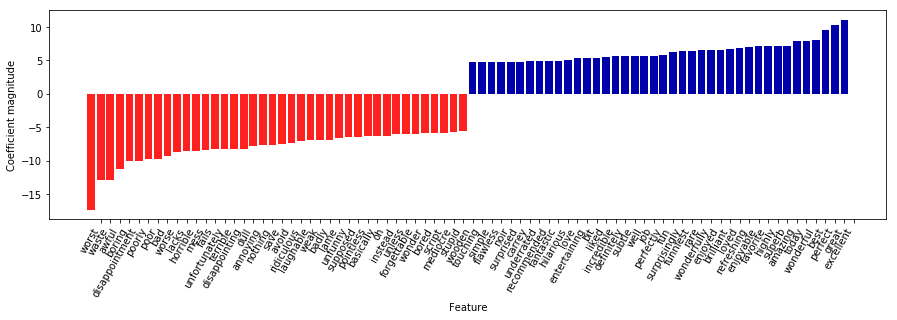

In [124]:
#visualize : 시각화하다
#coefficients : 계수
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

### 여러 단어로 만든 BOW (n-Grams)

- BOW표현방식은 단어의 순서가 완전히 무시된다는 것이 큰 단점임. 
- it's bad, not good at all = it's good, not bad at all
- 단어 앞에 있는 "not"은 문맥의 중요성을 잘 보여주는 예
- BOW표현방식을 사용할때 문맥을 고려하는 방법이 있음. 
- 토큰 하나의 횟수만 고려하지 않고, 옆에 있는 두세개의 토큰을 함께 고려하는 방식
- 토큰 두개를 bigram, 세개를 trigram, 연속된 토큰을 n-gram
- CountVectorizer와 TfidVectorizer는 n-gram range를 매개변수 특성으로 지정
- 입력값은 튜플이며 연속된 토큰의 최소길이와 최대길이

In [125]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man man knows himself to be a fool']


In [126]:
#ungream만 할대
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 13
어휘 사전:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [127]:
#연속된 토큰의 수가 커지면 보통 특성이 더 구체적이고 많이 만들어짐
#bigream만 할때
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 15
어휘 사전:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'man man', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [128]:
#bar-words에 있는 두문장사이에는 공통된 바이그램이 없음. 
print("변환된 데이터 (밀집 배열):\n{}".format(cv.transform(bards_words).toarray()))

변환된 데이터 (밀집 배열):
[[0 0 1 1 1 0 1 0 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 1 0 1 0 1 1]]


In [129]:
#5그램까지는 도움이 되지만 특성의 개수가 매우 많아지며, 과대적합될 가능성이 있음. 
#바이그램의 수는 유니그램수의 제곱, 트라이그램의 수는 유니그램의 세제곱
# 유니그램, 바이그램, 트라이그램을 적용한 예
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:{}\n".format(cv.get_feature_names()))

어휘 사전 크기: 41
어휘 사전:['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'man man', 'man man knows', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man man']



In [130]:
#IMDb영화리뷰 데이터에 TfidfVectorizer를 적용하고, 
#그리드서치로 최적의 n-그램 범위를 찾아보자
pipe = make_pipeline(TfidfVectorizer(min_df=3), LogisticRegression())
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에 그리드 서치 실행에 시간이 오래 걸린다

param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100],
               "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

# param_grid = {'logisticregression__C': [0.1],
#               "tfidfvectorizer__ngram_range": [(1, 2)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n{}".format(grid.best_params_))
# 바이그램과 트라이그램을 추가해서 성능이 1%이상 올라감. 

C:\Users\pc-21\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 크로스 밸리데이션 점수: 0.91
최적의 매개변수:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


In [131]:
#ngram_range와 C 매개변수에 대한 교차검증 정확도를 히트맵으로 나타내보자. 
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T

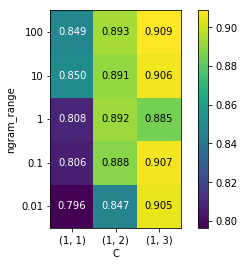

In [132]:
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['tfidfvectorizer__ngram_range'],
    yticklabels=param_grid['logisticregression__C'])
plt.colorbar(heatmap)

- 히트맵을 보니 바이그램이 성능을 크게 높여주며, 트라이그램은 정확도 측면에서 성능이 조금만 향상됨
- 모델이 어떻게 향상됐는지 더 잘 이해하기위해 유니그램, 바이그램, 트라이그램을 포함해 최적모델을 중요계수를 그래프로 나타냄.

(-22, 22)

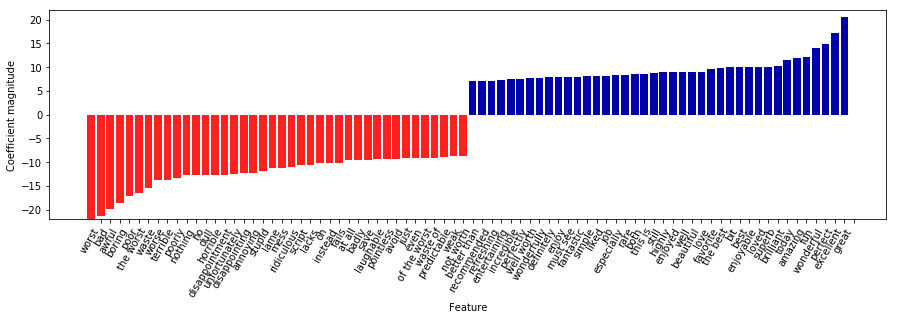

In [133]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

In [134]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다

(-22, 22)

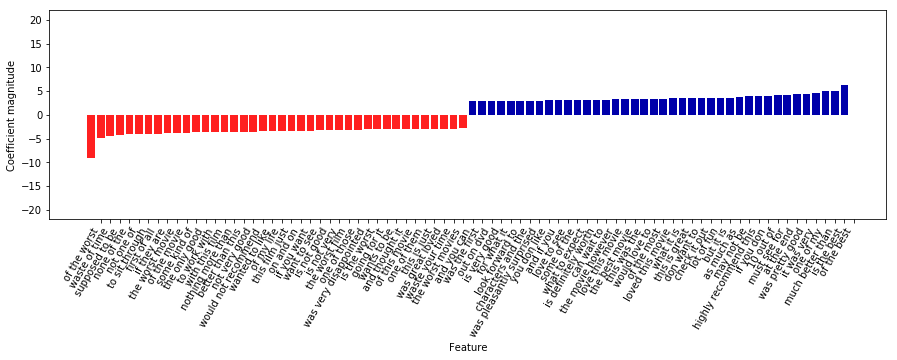

In [135]:
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)
#유니그램의 중요도와 비교하였을때 상당히 제한적임을 알 수 있음. 